In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [135]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv", index_col = 'PassengerId')

In [136]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [29]:
# EDA
print(len(titanic_data))
print(len(titanic_data[titanic_data['Survived'] == 1]))

891
342


In [30]:
print('% of men who survived', 100*np.mean(titanic_data['Survived'][titanic_data['Sex'] == 'male']))
print('% of women who survived', 100*np.mean(titanic_data['Survived'][titanic_data['Sex'] == 'female']))

% of men who survived 18.890814558058924
% of women who survived 74.20382165605095


In [72]:
print((titanic_data["Sex"] == 1).sum())
print((titanic_data["Sex"] == 0).sum())

577
314


In [63]:
print(100*np.mean(titanic_data["Survived"] == 1))

38.38383838383838


In [65]:
print(np.median(titanic_data["Fare"]))

14.4542


In [31]:
print('% of passengers who survived in first class', 100*np.mean(titanic_data['Survived'][titanic_data['Pclass'] == 1]))
print('% of passengers who survived in third class', 100*np.mean(titanic_data['Survived'][titanic_data['Pclass'] == 3]))

% of passengers who survived in first class 62.96296296296296
% of passengers who survived in third class 24.236252545824847


In [32]:
print('% of children who survived', 100*np.mean(titanic_data['Survived'][titanic_data['Age'] < 18]))
print('% of adults who survived', 100*np.mean(titanic_data['Survived'][titanic_data['Age'] > 18]))

% of children who survived 53.98230088495575
% of adults who survived 38.26086956521739


In [141]:
print(100*np.mean((titanic_data['Survived'][titanic_data['Pclass'] == 1]) & (titanic_data['Survived'][titanic_data["Age"] < 18])))
print(100*np.mean((titanic_data['Survived'][titanic_data['Pclass'] == 3]) & (titanic_data['Survived'][titanic_data["Age"] < 18])))
print(100*np.mean((titanic_data['Survived'][titanic_data['Pclass'] == 1]) & (titanic_data['Survived'][titanic_data["Age"] > 18])))
print(100*np.mean((titanic_data['Survived'][titanic_data['Pclass'] == 3]) & (titanic_data['Survived'][titanic_data["Age"] > 18])))

3.4700315457413247
5.513307984790875
17.391304347826086
6.459627329192546


In [33]:
titanic_data['Sex'] = titanic_data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [61]:
sib = (titanic_data["SibSp"] == 1).sum()
sib

209

In [40]:
titanic_data = titanic_data[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
X = titanic_data.drop('Survived', axis = 1)
y = titanic_data['Survived']
titanic_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,1,1,0,7.2500
2,1,1,0,1,0,71.2833
3,1,3,0,0,0,7.9250
4,1,1,0,1,0,53.1000
5,0,3,1,0,0,8.0500


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(y_test, model.predict(X_test)))

Training accuracy... 0.9295302013422819
Test accuracy 0.7796610169491526


In [44]:
from sklearn.tree import export_graphviz
import graphviz

In [45]:
dot_data= export_graphviz(model, out_file=None, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True)

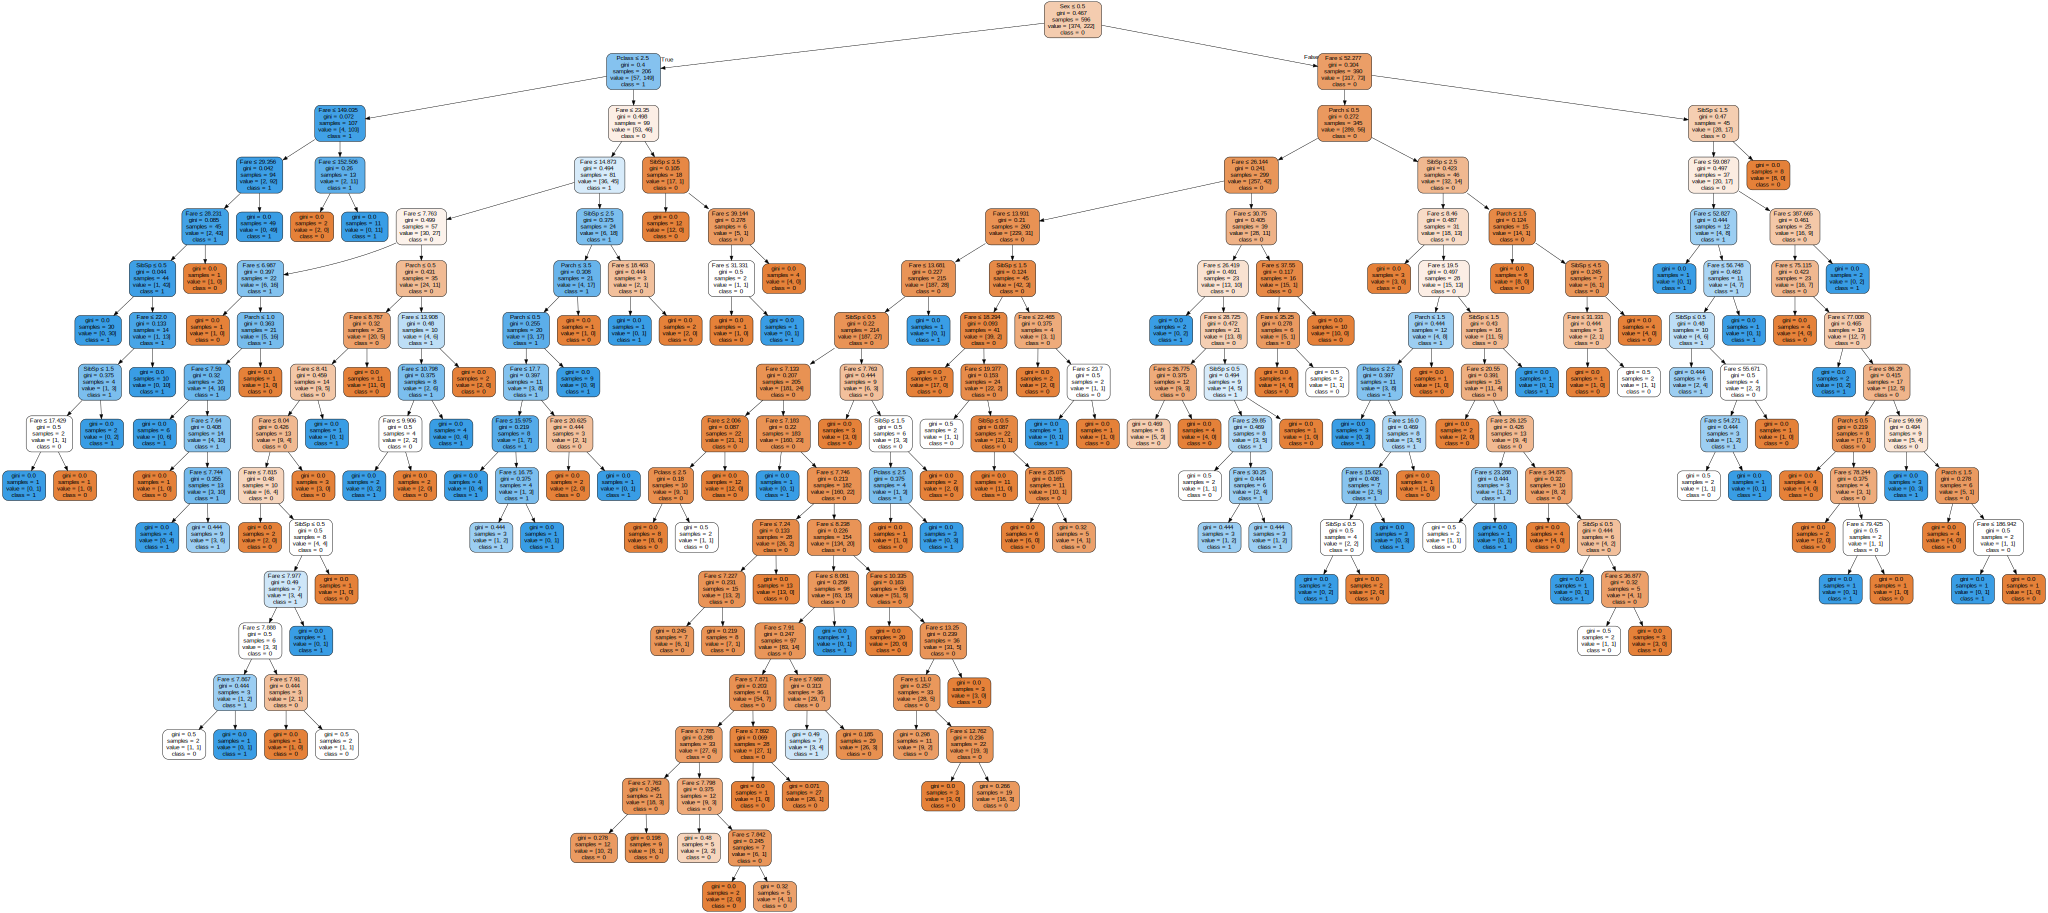

In [46]:
graph1=graphviz.Source(dot_data)
graph1

In [47]:
model_improved = DecisionTreeClassifier(max_depth = 3)
model_improved.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
print('train score...' , accuracy_score(y_train, model_improved.predict(X_train)))
print('test score...', accuracy_score(y_test, model_improved.predict(X_test)))

train score... 0.8087248322147651
test score... 0.8135593220338984


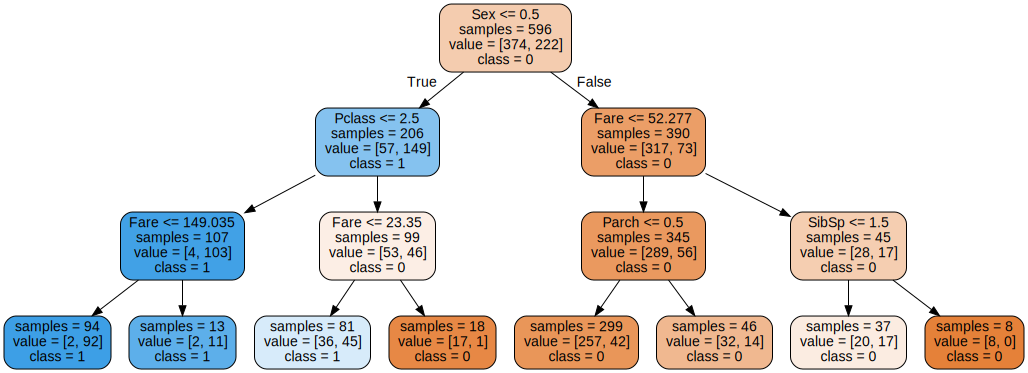

In [49]:
dot_data= export_graphviz(model_improved, out_file=None,impurity=False, 
                    feature_names=X_test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True)
graph2=graphviz.Source(dot_data)
graph2

In [50]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
# prints y-intercept
print(linear_regressor.intercept_)

# prints the coefficient
print(linear_regressor.coef_)

0.9961318311737304
[-0.12003664 -0.51579448 -0.02982413 -0.0219317   0.0006218 ]


In [52]:
y_pred = linear_regressor.predict(X_test)

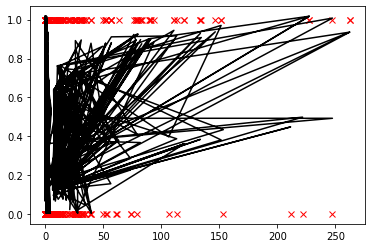

In [53]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

In [54]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

0.29610280614374385
0.1398871973617485
0.5441532928722786


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.42030079283780175

In [102]:
titanic = pd.read_csv("https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv", index_col = 'PassengerId')

In [74]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
survived_passengers = (((titanic["Survived"] == 1) & (titanic["Embarked"] == 'S')).sum())
survived_passengers

217

In [94]:
titanic.nlargest(5,["Fare"])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S


In [97]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [98]:
titanic = titanic["Age"].dropna()

In [99]:
titanic.isnull().sum()

0

In [103]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [104]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [105]:
titanic["Age"].median()

28.0

In [132]:
import numpy as np
np.count_nonzero(titanic["Name"].unique())

891